In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.utils import image_dataset_from_directory

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory("dataset_iris/train/",
                                                 target_size = (256, 256),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("dataset_iris/test/",
                                            target_size = (256, 256),
                                            batch_size = 20,
                                            class_mode = 'categorical')

Found 336 images belonging to 3 classes.
Found 85 images belonging to 3 classes.


In [9]:
# Se inicializa la CNN
classifier = Sequential()

# Paso 1. Se aplica la convolución a cada imagen
classifier.add(Conv2D(10, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Paso 2. Se hace pooling
classifier.add(MaxPooling2D((2, 2)))

classifier.add(Conv2D(10, (3, 3), activation = 'relu'))
classifier.add(Conv2D(10, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D((2, 2)))

# Step 3 - Flattening (aplanado)
classifier.add(Flatten())

# Step 4 - Se conecta la red
classifier.add(Dense(units = 3, activation = 'softmax'))

In [10]:
# Se compila la CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

In [16]:
history_1 = classifier.fit(train_set,
               epochs = 50,
               validation_data = test_set)

Epoch 1/50
17/17 [==============================] - 4s 251ms/step - loss: 0.2148 - accuracy: 0.9226 - val_loss: 2.0505 - val_accuracy: 0.5529
Epoch 2/50
17/17 [==============================] - 4s 248ms/step - loss: 0.1479 - accuracy: 0.9524 - val_loss: 2.0175 - val_accuracy: 0.5647
Epoch 3/50
17/17 [==============================] - 4s 250ms/step - loss: 0.1814 - accuracy: 0.9435 - val_loss: 2.2532 - val_accuracy: 0.6000
Epoch 4/50
17/17 [==============================] - 5s 288ms/step - loss: 0.1561 - accuracy: 0.9375 - val_loss: 1.9358 - val_accuracy: 0.5294
Epoch 5/50
17/17 [==============================] - 5s 264ms/step - loss: 0.1785 - accuracy: 0.9375 - val_loss: 2.1445 - val_accuracy: 0.5647
Epoch 6/50
17/17 [==============================] - 5s 266ms/step - loss: 0.1527 - accuracy: 0.9464 - val_loss: 2.2513 - val_accuracy: 0.5882
Epoch 7/50
17/17 [==============================] - 5s 269ms/step - loss: 0.1348 - accuracy: 0.9583 - val_loss: 2.0458 - val_accuracy: 0.5294
Epoch 

In [17]:
# Evaluate on the test data
classifier.evaluate(test_set)

5/5 [==============================] - 0s 31ms/step - loss: 2.6080 - accuracy: 0.5647


[2.6079657077789307, 0.5647059082984924]

In [21]:
import matplotlib.pyplot as plt
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

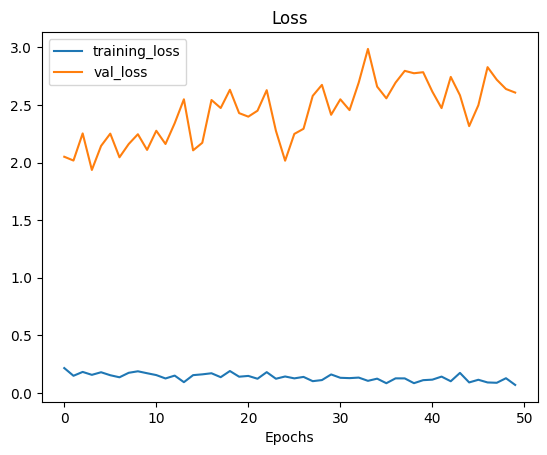

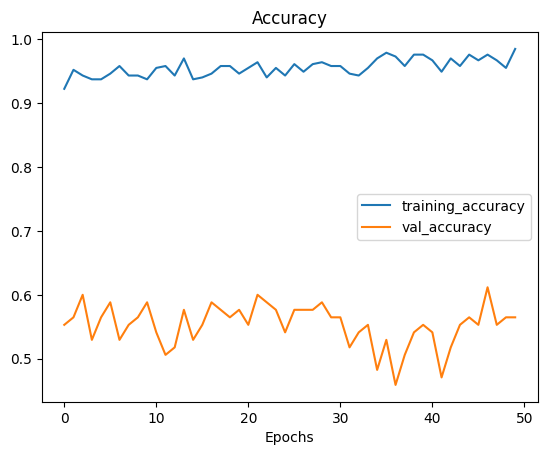

In [22]:
# Check out the loss curves of model_1
plot_loss_curves(history_1)